# Planning Stage: Individual Assignment 1 - Data Description and Exploratory Data Analysis

In [10]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(modelr)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:faraway’:

    happy



Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap




In [37]:
door_dash <- read_csv("data/cleaned_full_data.csv")

New names:
• `` -> `...1`
Rows: 3290 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): restaurant, url, city, price_range, category_1, category_2
dbl (4): ...1, distance, star, num_reviews

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Data Description:

The data set for my group is a compilation of eight data sets that each show restaurants within under 30 minutes delivery time in eight different populous cities in Canada. The original data was collected from the Door Dash website and the eight data sets were compiled and cleaned by Kaggle user Satoshi_S: https://www.kaggle.com/code/satoshiss/clean-restaurant-raw-data. 



In [3]:
paste("There are", nrow(door_dash), "observations and", ncol(door_dash), "variables in this dataset.")

[1] "There are 3290 observations and 10 variables in this dataset."

In [4]:
summary(door_dash)

      ...1         restaurant            url               distance     
 Min.   :   0.0   Length:3290        Length:3290        Min.   : 0.010  
 1st Qu.: 822.2   Class :character   Class :character   1st Qu.: 0.500  
 Median :1644.5   Mode  :character   Mode  :character   Median : 1.000  
 Mean   :1644.5                                         Mean   : 5.039  
 3rd Qu.:2466.8                                         3rd Qu.: 1.600  
 Max.   :3289.0                                         Max.   :30.000  
                                                                        
      star        num_reviews          city           price_range       
 Min.   :1.000   Min.   :   10.0   Length:3290        Length:3290       
 1st Qu.:4.300   1st Qu.:   57.0   Class :character   Class :character  
 Median :4.500   Median :  182.0   Mode  :character   Mode  :character  
 Mean   :4.451   Mean   :  570.4                                        
 3rd Qu.:4.700   3rd Qu.:  560.0                   

Pre-selection of variables:

I will be dropping the first variable labeled ...1. This variable is an index and therefore should not be involved in any model I create. Additionally, I will also be dropping the url variable. Each of the urls are identical except for the unique numerical sequence that indicates which website to direct to, essentially making the URL equivalent to an ID and therefore irrelavent to my future analysis.

Question:

a) I want to examine the association between the city a restaurant is in (response) and predictors related to type of restaurant such as price and category, as well as the predictors related to the performance of a restaurant such as number of reviews and star rating. Ultimately I am investigating the association between the city and the kinds of restaurants that perform better there.

b) My question is focused on inference because I am taking information from an observational study and looking to glean information into associations not causations. 

In [38]:
door_dash <- door_dash %>%
    select(distance, star, num_reviews, city, price_range, category_1, category_2)
head(door_dash)

distance,star,num_reviews,city,price_range,category_1,category_2
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0.90,4.0,640,Branpton,$$,Indian,Wraps
2.00,4.0,301,Branpton,$$,Chinese,Chicken
1.00,4.2,890,Branpton,$$,Bakery,Chicken
0.40,4.4,109,Branpton,$,Italian,Sandwiches
0.09,4.5,481,Branpton,$$,Fast Food,Sandwiches
0.90,3.7,730,Branpton,$$,Shawarma,Vegetarian


Warning message in geom_histogram(stat = "count", binwidth = 30):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


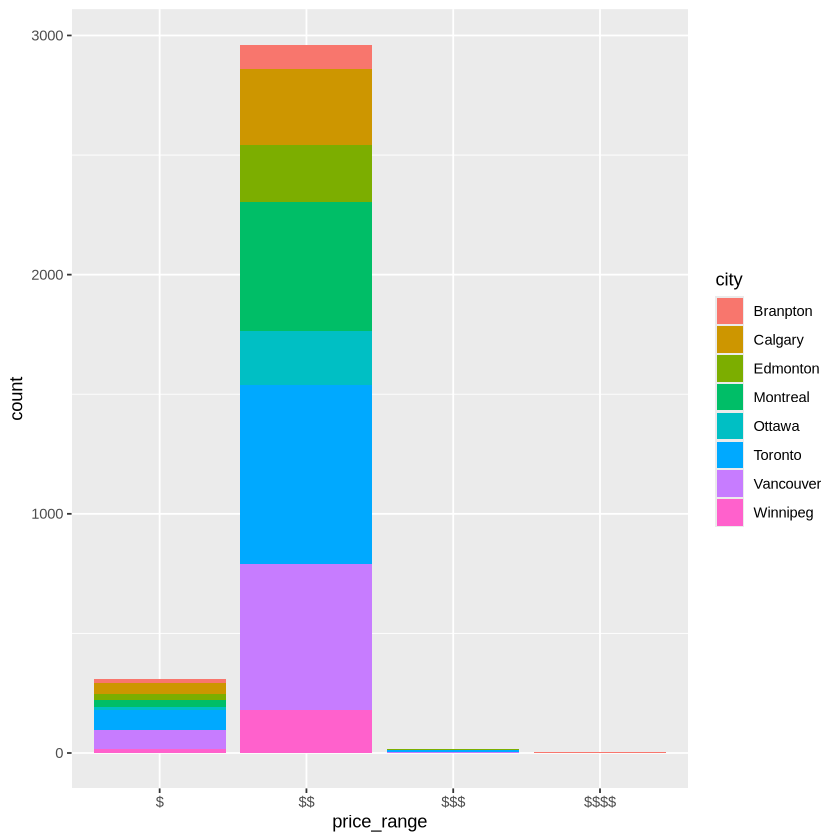

In [46]:
door_dash_plot <- door_dash %>%
    ggplot(aes(x = price_range, fill = city)) +
    geom_histogram(stat = "count", binwidth = 30)
door_dash_plot